In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('EV_Dataset_with_Updated_Registrations.csv')

In [ ]:
df

,Unnamed: 0,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,1
1,1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,42
2,2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,89
3,3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,47
4,4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,58
5,5,Chhattisgarh,6424,5341.0,117,1077.0,1.0,0.0,0.0,368.0,100.0,13428,81
6,6,Delhi,14730,112831.0,3051,49.0,39.0,0.0,0.0,0.0,1602.0,132302,539
7,7,Goa,1314,28.0,289,13.0,36.0,2.0,0.0,0.0,4.0,1686,40
8,8,Gujarat,13662,1869.0,1309,28.0,278.0,344.0,0.0,26.0,77.0,17593,964
9,9,Haryana,7777,18595.0,186,122.0,8.0,2.0,0.0,0.0,90.0,26780,275


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      32 non-null     int64  
 1   State Name                      32 non-null     object 
 2   Two Wheeler                     32 non-null     int64  
 3   Three Wheeler                   32 non-null     float64
 4   Four Wheeler                    32 non-null     int64  
 5   Goods Vehicles                  32 non-null     float64
 6   Public Service Vehicle          32 non-null     float64
 7   Special Category Vehicles       32 non-null     float64
 8   Ambulance/Hearses               32 non-null     float64
 9   Construction Equipment Vehicle  32 non-null     float64
 10  Other                           32 non-null     float64
 11  Grand Total                     32 non-null     int64  
 12  total-charging-stations         32 non

In [ ]:
df.describe()

,Unnamed: 0,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,15.500000,16800.406250,25790.406250,3647.750000,94.875000,63.718750,12.81250,0.187500,12.406250,137.875000,30198.843750,508.968750
std,9.380832,33874.387475,53127.216014,7875.662868,287.596912,161.503467,60.76047,0.470929,65.050283,377.119879,54220.859227,1206.470445
min,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,20.000000,1.000000
25%,7.750000,68.500000,31.500000,79.500000,1.750000,0.750000,0.00000,0.000000,0.000000,1.000000,1323.000000,39.000000
50%,15.500000,1984.500000,1992.000000,171.500000,10.000000,12.500000,0.00000,0.000000,0.000000,11.000000,11156.500000,62.500000
75%,23.250000,10306.500000,39250.000000,2441.500000,31.250000,40.000000,1.00000,0.000000,0.000000,58.000000,45205.000000,283.000000
max,31.000000,120000.000000,270000.000000,32000.000000,1281.000000,851.000000,344.00000,2.000000,368.000000,1602.000000,276217.000000,5765.000000


In [ ]:
drop_columns = ['Unnamed: 0','State Name','Grand Total']
df_clustering = df.drop(columns=drop_columns)

In [ ]:
df_clustering.head()

,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,total-charging-stations
0,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,1
1,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,42
2,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,89
3,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,47
4,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,58


Text(0.5, 1.0, 'Elbow Method')

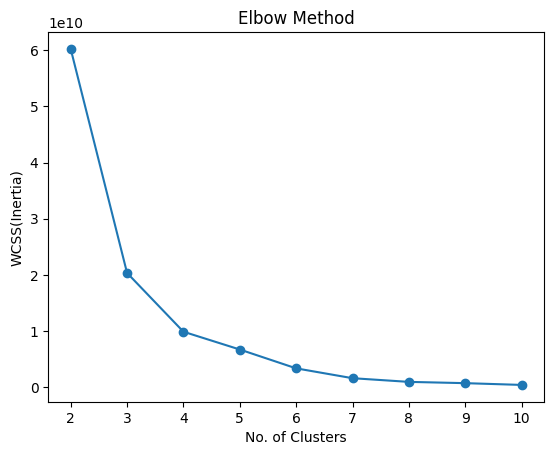

In [ ]:
#elbow method for finding optimum no. of clusters
wcss=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(df_clustering)
  wcss.append(kmeans.inertia_)

plt.plot(range(2,11),wcss,marker='o')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS(Inertia)')
plt.title('Elbow Method')

In [ ]:
from sklearn.metrics import silhouette_score
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  labels=kmeans.fit_predict(df_clustering)
  score=silhouette_score(df_clustering,labels)
  print(f'Silhouette score for K= {k} : {score:.3f}')

Silhouette score for K= 2 : 0.792
Silhouette score for K= 3 : 0.722
Silhouette score for K= 4 : 0.710
Silhouette score for K= 5 : 0.688
Silhouette score for K= 6 : 0.672
Silhouette score for K= 7 : 0.681
Silhouette score for K= 8 : 0.577
Silhouette score for K= 9 : 0.543
Silhouette score for K= 10 : 0.503


In [ ]:
kmeans=KMeans(n_clusters=4, random_state=42) #selecting 4 clusters and clustering
df['Cluster']= kmeans.fit_predict(df_clustering)
df

,Unnamed: 0,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations,Cluster
0,0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,1,0
1,1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,42,0
2,2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,89,2
3,3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,47,2
4,4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,58,0
5,5,Chhattisgarh,6424,5341.0,117,1077.0,1.0,0.0,0.0,368.0,100.0,13428,81,0
6,6,Delhi,14730,112831.0,3051,49.0,39.0,0.0,0.0,0.0,1602.0,132302,539,2
7,7,Goa,1314,28.0,289,13.0,36.0,2.0,0.0,0.0,4.0,1686,40,0
8,8,Gujarat,13662,1869.0,1309,28.0,278.0,344.0,0.0,26.0,77.0,17593,964,0
9,9,Haryana,7777,18595.0,186,122.0,8.0,2.0,0.0,0.0,90.0,26780,275,0


In [ ]:
df['Cluster']= kmeans.labels_

In [ ]:
df.groupby('Cluster')['Grand Total'].mean()

,Grand Total
Cluster,
0,6829.00
1,276217.00
2,72195.25
3,61074.50


In [ ]:
df.groupby('Cluster')[['State Name']].value_counts(normalize=True)

Cluster  State Name                              
0        Andaman and Nicobar Island                  0.043478
         Arunachal Pradesh                           0.043478
         Chandigarh                                  0.043478
         Chhattisgarh                                0.043478
         Dadra and Nagar Haveli and Daman and Diu    0.043478
         Goa                                         0.043478
         Gujarat                                     0.043478
         Haryana                                     0.043478
         Himachal Pradesh                            0.043478
         Jammu and Kashmir                           0.043478
         Jharkhand                                   0.043478
         Kerala                                      0.043478
         Ladakh                                      0.043478
         Manipur                                     0.043478
         Meghalaya                                   0.043478
         Mizoram                                     0.043478
         Nagaland                                    0.043478
         Odisha                                      0.043478
         Puducherry                                  0.043478
         Punjab                                      0.043478
         Sikkim                                      0.043478
         Tripura                                     0.043478
         Uttarakhand                                 0.043478
1        Uttar Pradesh                               1.000000
2        Assam                                       0.250000
         Bihar                                       0.250000
         Delhi                                       0.250000
         West Bengal                                 0.250000
3        Karnataka                                   0.250000
         Maharashtra                                 0.250000
         Rajasthan                                   0.250000
         Tamil Nadu                                  0.250000
Name: proportion, dtype: float64

CLUSTER 0: Focus on Cluster 1 states for expanding premium and mass-market EV models, emphasizing existing infrastructure.

CLUSTER 1: States with high vehicle counts across categories and abundant charging stations, indicating ready markets.

CLUSTER 2: States with lower vehicle counts but growing infrastructure, representing potential markets for EV expansion.

CLUSTER 3: States with lower vehicle counts but growing infrastructure, representing high scale markets for EV expansion.

In [ ]:
features= ['Two Wheeler','Three Wheeler','Four Wheeler','Goods Vehicles','Public Service Vehicle','Special Category Vehicles','Ambulance/Hearses','Construction Equipment Vehicle','Other']
X=df_clustering[features]

#apply PCA
pca=PCA(n_components=2)
pca_result= pca.fit_transform(X)
df['PCA1']=pca_result[:,0]
df['PCA2']=pca_result[:,1]

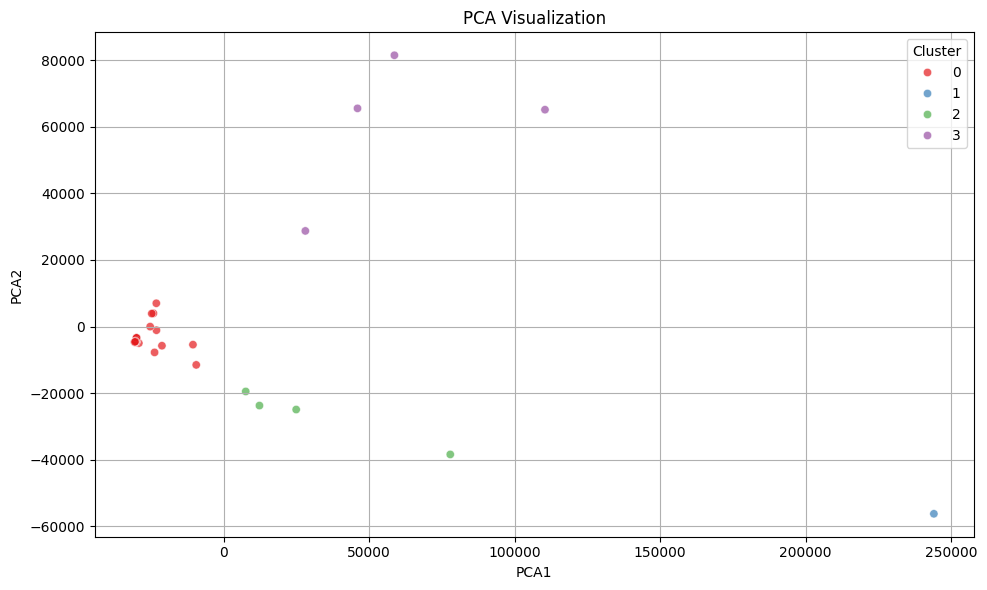

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='PCA1',y='PCA2',hue='Cluster',palette='Set1',alpha=0.7)
plt.title('PCA Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.tight_layout()
plt.show()

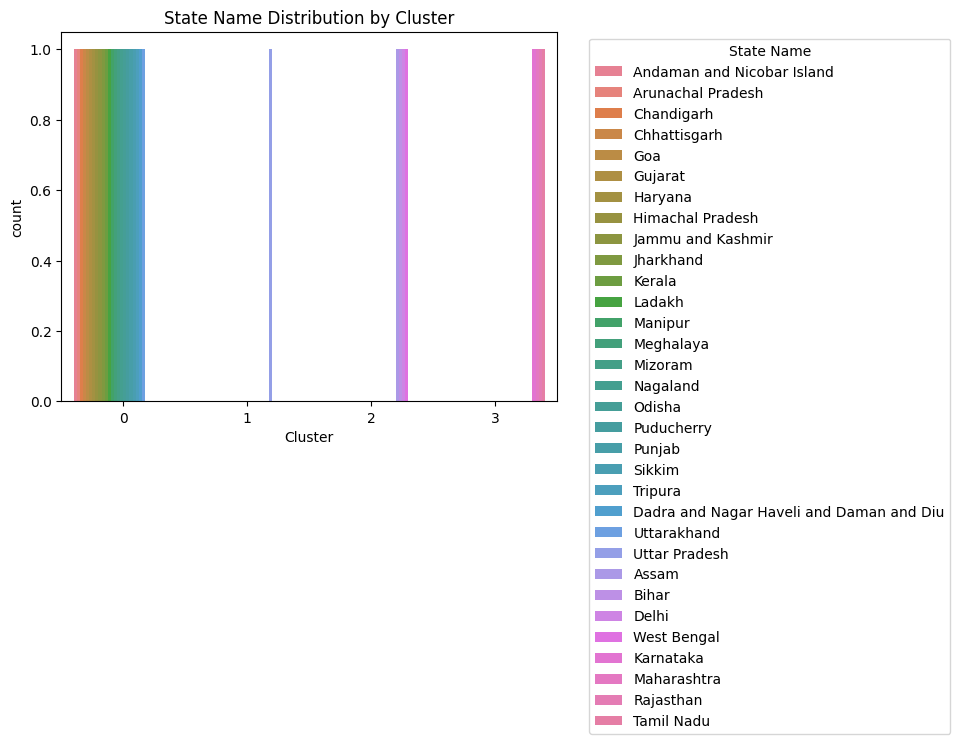

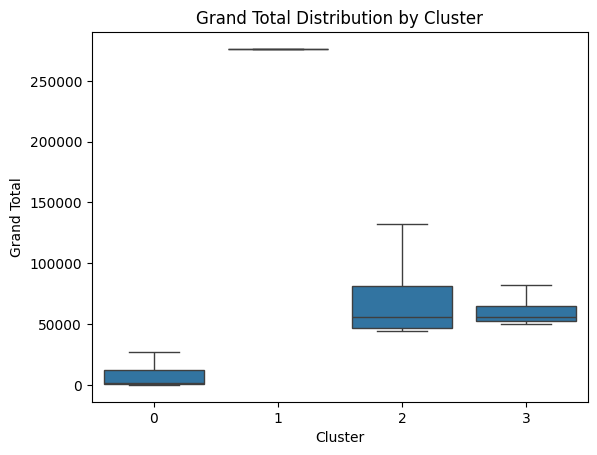

In [ ]:
# Mosaic equivalent (stacked bar for each segment)
sns.countplot(data=df, x='Cluster', hue='State Name')
plt.legend(title='State Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("State Name Distribution by Cluster")
plt.show()


sns.boxplot(data=df, x='Cluster', y='Grand Total')
plt.title("Grand Total Distribution by Cluster")
plt.show()
